In [1]:

# %matplotlib widget
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import h5py

import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse
import kvn

colors_ = ["blue", "red", "green", "gray", "black"]

92392
c:\Users\novikau1\Documents\work\codes\QuCF\scripts-py


In [2]:
for i in range(10):
    plt.close()


--- Fixed kmax, scan on Nk (on dk) ---


C:\Users\novikau1\AppData\Local\Temp\ipykernel_92392\2133859177.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  y_qc[ii] = np.sum( w * np.exp(- 1.j * k * A * t[ii]) )


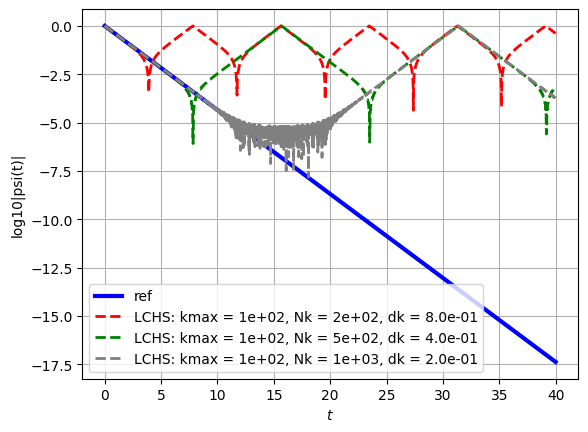

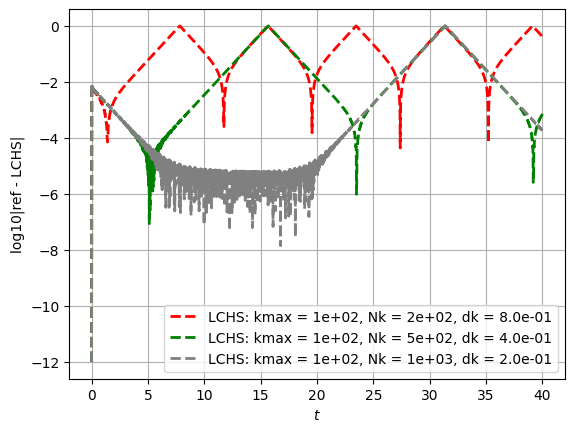


--- Fixed dk, scan on kmax ---


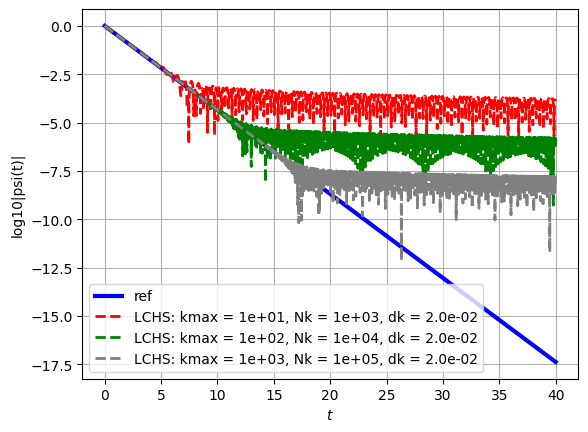

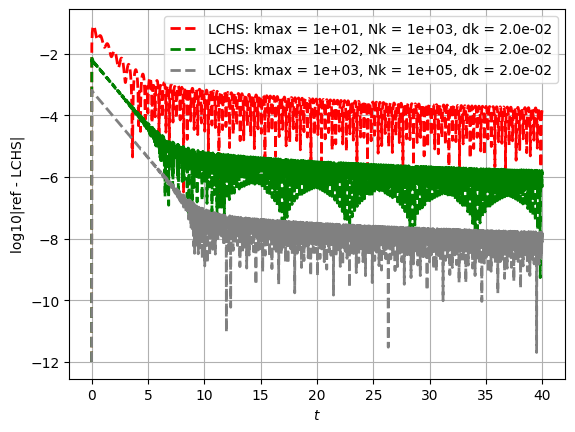

In [39]:
# -------------------------------------------------------
# --- Error in the LCHS simulation ---
# -------------------------------------------------------
def get_lchs(kmax, Nk):
    Nk = int(Nk)
    k = np.linspace(-kmax, kmax, Nk)
    
    dk = np.diff(k)[0]
    coef_dk = dk / np.pi
    w = coef_dk / (1 + k**2)

    str_label = "kmax = {:0.0e}, Nk = {:0.0e}, dk = {:0.1e}".format(kmax, Nk, dk)

    y_qc = np.zeros(Nt)
    for ii in range(Nt):
        y_qc[ii] = np.sum( w * np.exp(- 1.j * k * A * t[ii]) )
    return y_qc.real / y_qc[0].real, str_label

# ------------------------------------------------------------------------------
def plotting_signals(qc_data):

    # --- signals ---
    fig = plt.figure()
    ax = fig.add_subplot(111)   
    ax.plot(t, np.log10(y_ref), "-b", linewidth = 3, label="ref")
    counter_curve = 0
    for dd in qc_data:
        counter_curve += 1
        ax.plot(
            t, np.log10(np.abs(dd[0])), 
            "--", color = colors_[counter_curve], linewidth = 2, 
            label="LCHS: {:s}".format(dd[1])
    )
    plt.xlabel('$t$')
    plt.ylabel("log10|psi(t)|")
    ax.legend()
    plt.grid(True)
    plt.show()

    # --- errors ---
    fig = plt.figure()
    ax = fig.add_subplot(111)   
    counter_curve = 0
    for dd in qc_data:
        counter_curve += 1

        log_err = np.zeros(Nt)
        for it in range(Nt):
            temp = np.abs(y_ref[it] - dd[0][it])
            if temp <= 1e-12:
                temp = 1e-12
            log_err[it] = np.log10(temp)

        ax.plot(
            t, log_err, 
            "--", color = colors_[counter_curve], linewidth = 2, 
            label="LCHS: {:s}".format(dd[1])
    )
    plt.xlabel('$t$')
    plt.ylabel("log10|ref - LCHS|")
    ax.legend()
    plt.grid(True)
    plt.show()
    return
# ------------------------------------------------------------------------------
A = 1.0

# --- time grid ---
Nt = 2001
t_max = 40.
t = np.linspace(0, t_max, Nt)

# --- reference signal ---
y_ref = np.exp(- A * t)

# --- kmax = 100, scan on Nk (on dk) ---
print()
print("--- Fixed kmax, scan on Nk (on dk) ---")
kmax = 100
Nk_grid = [0.25e3, 0.50e3, 1.00e3]
qc_data = []
for Nk in Nk_grid:
    qc_data.append(get_lchs(kmax, Nk))
plotting_signals(qc_data)

# --- fixed dk = 100, scan kmax ---
print()
print("--- Fixed dk, scan on kmax ---")
kmax_grid = np.array([1e1, 1e2, 1e3])
Nk_grid   = kmax_grid * 100
qc_data = []
for ii in range(len(kmax_grid)):
    qc_data.append(get_lchs(kmax_grid[ii], Nk_grid[ii]))
plotting_signals(qc_data)